# Réseau de neurones à plusieurs couches (généralisation)

ATTENTION : **Ce nouveau notebook étant basé sur un article différent du précédent, il en diffère en grande partie. son approche est, de manière générale, plus analytique et moins matricielle. Il comporte donc une seconde partie qui se base sur les résultats de la première pour nous ramener à notre cas "classique".**

*Projet réalisé dans le cadre du cours de Méthodes Numériques enseigné par David Gontier Phd.*

In [0]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


## 1. Défintion des réseaux de neurones multi-couches

Les réseaux de neurones multi-couches (ou perceptrons) définissent une classe de fonctions dont l’intérêt est de pouvoir approcher n’importe quelle fonction continue à support compact (voir théorème sur la densité).

### 1.1 Un neurone

Un neurone à p entrées est une fonction $ f : \mathbb{R}^{p+1} \times \mathbb{R} \rightarrow \mathbb{R} $ définie par :

- $ g : \mathbb{R} \longrightarrow \mathbb{R} $
- $ W \in \mathbb{R}^{p+1}, W = (w_1,...,w_{p+1}) $
- $ \forall x \in \mathbb{R}^p, f\left(W,x\right) = g \left( \sum_{i=1}^{p} w_ix_i + w_{p+1} \right) $ avec $ x=(x_1,..,x_p)$

Cette définition est semblable à celle du neurone biologique, les poids jouant le rôle de "synapse" (connexions) entre les neurones.  
Le vecteur $x = (x_1,...,x_p)$ est donc celui des entrées et le vecteur $W$ celui des *coefficients* ou *poids*. Le coefficient $w_{p+1}$ est appelé *biais* et sera noté $b$.
La fonction $g$ est appelée *fonction de transfert*, *fonction d'activation* ou *fonction de seuil*.  
  
On apelle le **potentiel d'un neurone** ($y$) les informations qu'il contient avant de la transformer avec la fonctions de seuil : $y = \sum_{i=1}^p w_ix_i + b$ et on a donc $z = f(y)$

La *fonction d'activation* a la particularité d'être **non linéaire**, elle représente en quelque sorte le *traitement de l'information par le neurone* qui n'est bien évidemment par linéaire.  
Toujours dans un but d'approcher (ou de copier) la biologie, cette fonction est souvent semblable à un seuil. On utilise généralement :

$$
\begin{array}{c c}
fonctions & expression \\
escalier & 1_{[0,+\infty[} \\
linéaire & x \\
sigmoïde([1,0]) & \dfrac{1}{1+e^{-x}} \\
sigmoïde([-1,1]) & 1 - \dfrac{2}{1+e^{x}} \\
normale & e^{\frac{-x^2}{2}} \\
exponentielle & e^x \\
\end{array}
$$


### 1.2 Une couche de neurones

Soient $p$ et $n$ deux entiers naturels, on note $W \in \mathbb{R}^{n(p+1)} = (W_1,...,W_n)$ avec $\forall i \in (1,..,n), W_i \in \mathbb{R}^{p+1}$  
Une couche de $n$ neurones et $p$ entrées est une fonction :  
$F : \mathbb{R} ^{n(p+1)} \times \mathbb{R}^p \longrightarrow \mathbb{R}^n $  
Vérifiant :

- $\forall i \in (1,...,n), f_i$ est un neurone
- $\forall W \in \mathbb{R}^{n(p+1)} \times \mathbb{R}^p , F(W,x) = (f_1(W_1,x),...,f_n(W_n,x))$
  
Une couche de neurones est donc la **juxtaposition de plusieurs neurones** qui partagent les mêmes entrées mais ayant chacuns leur propre vecteur de coeffitients (de poids) et leur propre sortie.


### 1.3 Un réseau de neurones

Un réseau de neurones multi-couches à $n$ sorties et $p$ entrées et $C$ couches est une **liste de couche** $(C_1,...,C_C)$ connectées les une aux autres de telle sorte que :

- $\forall i \in (1,...,C)$ chaque couche $C_i$ possède $n_i$ neurones et $p_i$ entrées
- $\forall i \in (1,...,C-1), n_i = p_{i+1}$, et on a de plus : $p_1 = p$ et $n_c = n$

Les coefficients de la couche $C_i$ sont notés $(W_1^i,...,W_{n_i}^i)$ cette couche définit une fonction $F_i$ comme ci-dessus. On définit alors la **suite $(Z_i)_{0\leqslant i\leqslant C}$** définie par :
- $Z_0 \in \mathbb{R}$
- $\forall i \in (1,...,C), Z_i = F_i(W_1^i,...,W_{n_i}^i,Z_{i-1}) = F_i(W^i,Z_{i-1})$
  
On pose alors : $M = \sum_{i=1}^C n_i(p_i+1)$ définissant ainsi un réseau de neurones comme une fonction $F$ telle que :
$$
\begin{array}{c c c c}
F : & \mathbb{R}^M \times \mathbb{R}^p & \longrightarrow & \mathbb{R}^n \\
 & (W,Z_0) & \longrightarrow & Z_C
\end{array}
$$

### 1.4 Notation utilisées pour la suite

On énumère alors toutes les notations qui seront utilisées plus tard :

- $(x_1,...,x_n)$ : les entrées
- $C_i$ : nombre de neurones sur la couche $i$, $C_0 = p$
- $z_{c,i}$ : sortie du neurone $i$ de la couche $c$, par extenstion, $z_{0,i} = x_i$
- $y_{c,i}$ : potentiel du neurone $i$ de la couche $c$
- $w_{c,i,j}$ : coefficient associé à l'entrée $j$ du neurone $i$ de la couche $c$
- $b_{c,i}$ : biais du neurone $i$ de la couche $c$
- $f_{c,i}$ : fonction de seuil du neurone $i$ de la couche $c$
  
On notera donc $W_c$ la matrice des poids associés à la couche $c$, et $B_c$ la matrice des biais associés à la couche $c$.  
On considère alors que les entrées constituent un couche $C_0$ de manière à simplifier les notations. Chaque couche C_i a donc pour entrée les sorties de la couche $C_{i-1}$, soit le vecteur $Z_{i-1}$.

### 1.5 Propagation

C'est l'algorithme qui permet de calculer les sorties d'un réseau de neurones (vérifiant la définition ci-dessus). Il s'agit donc de calculer les sorties connaissant les poids $w_{c,i,j}$ et les entrées $x_j$ :
$$
\begin{array}{c c c}
Z_c & \longleftarrow & X
\end{array}
$$
On calule alors de manière itératif la suite $(Z_c)_{0\leqslant c\leqslant C}$ :  
  
                                           pour c dans (1,...,C):
$$
\begin{array}{c c c}
Y_c & \longleftarrow & W_cZ_{c-1} + B_c \\
Z_c & \longleftarrow & F(Y_c)
\end{array}
$$

### 1.6 Généralités

Le nombre de couche d'un réseau de neurones est illimité. les réseaux de deux couches ne sont pas réellement intéressants (constitués d'une entrée et d'une sortie). En effet, ils reviennent à une simple multiplication matricielle, rendant "l'épaisseur" des vecteurs poids inutile. Trois couches sont nécessaires au minimum pour obtenir des réseaux aux propriétés de densité intéréssantes. Cela revient donc à une couche d'entrée, une de sortie et une couche dite "*cachée*" qui fera le travail d'apprentissage.  
Nous verrons plus tard les propriétés de densités des réseau de neurones.

### 1.7 Programmation

In [0]:
#Définition de la fonction de seuil
def sigmoid(x):
    return 1/(1+exp(-x))

def g1(x):
    return sigmoid(x)

#Ici le calcul n'est pas matriciel, w est donc de taille p+1 et W de taille n*(p+1)
def Neurone(w,x,g):
    p =len(x)
    S = 0
    for i in range(p):
        S += w[i]*x[i]
    S += w[p]
    ex = g(S)
    return ex

def Couche1(W,x,g):
    p = len(x)
    n = len(W)
    F = zeros(n)
    for i in range(n):
        F[i] = Neurone(W[i],x,g)
    return F

#Ici le calcul est matriciel, W est donc de taille n*p et B de taille n.
def Couche2(W,B,x,g):
    return g(W.dot(x) + B)

#Algorithme de propagation
def Propagation(x,W,fseuil = sigmoid,fsortie = softmax,nbcouches = 2):
    Zc = x
    for c in nbcouches:
        Yc = Wc.dot()

In [0]:
#Vérification de l'algorithme
n = 5
p = 3
w = ones(p+1)
x = array([1,2,3])
assert (Neurone(w,x,g1) == g1(7))

W1 = ones((n,p+1))
W2 = ones((n,p))
B = ones(n)
assert(norm(Couche2(W2,B,x,g1)) == norm(Couche1(W1,x,g1)))
assert((norm(Couche1(W1,x,g1))) == norm(g1(array([7,7,7,7,7]))))

## 2. Classification

Le problème est le suivant : on cherche le lien entre une variable $X$ et une variable aléatoire discrète suivant une loi multinomiale $Y$ :
  
  
Soit une variable aléatoire $X$ et une variable aléatoire discrète $Y$, l'objectif est d'approximer la fonction $\mathbb{E}(Y\mid X) = f(X)$. Les données du problème sont un échantillon de points : $\{(X_i,Y_i)\mid 1\leq i\leq N\}$ avec $\forall i\in \{1,..,N\}, \forall c \in \{1,..,C\}, \mathbb{P}(Y_i = c\mid X_i,\theta) = h(\theta,X_i,c)$ avec $N \in \mathbb{N}$, $h$ est une fonction de parmètre $\theta$ à valeurs dans $[0,1]$ vérifiant la contrainte : $\sum_{c=1}^C h(\theta,X,c) = 1$.

Nous allons donc nous intéresser à une classification en deux classes qui consiste à chercher le lien entre la variable aléatoire réelle $X$ et la variable aléatoire discrète $Y \in \{0,1\}$.
On dispose pour cela d'un set de données :
  
$$
\{(X_i,Y_i) \in \mathbb{R}^2 \times \{0,1\}\mid 1\leq i\leq N\}
$$
  
Etant donné qu'il n'est pas évident de déterminer une fonction $h$ qui approxime $Y\mid X$, $h$ et $Y$ étant toutes deux discrètes, on préférera déterminer la loi marginale : $\mathbb{P}(Y = c\mid X) = f(X,\theta,c)$.
$f$ est alors une fonction dont les sorties sont continues, et peut être choisie dérivable. On prendra donc ici $f$ comme un réseau de neurones dont les sorties vérifient :
  
$$
f(X,0) +f(X,1) = \mathbb{P}(0\mid X) + \mathbb{P}(1\mid X) = 1
$$

## 3. Théorème de la densité des réseaux de neurones

Sans rentrer dans des démonstrations alambiquées et hypercalculatoires, on retiendra deux éléments importants :

### 3.1 Formualtion du problème de régréssion

#### 3.1.1 Supposant les résidus i.i.d. $\sim \mathcal{N}(\mu,\sigma^2)$

Soient deux variables aléatoires continues $(X,Y) \in \mathbb{R}^p \times\mathbb{R}^q \sim \mathcal{L}$ quelconque, la résolution du problème de régression est l’estimation de la fonction $\mathbb{E}(Y\mid X) = F(X)$. Pour cela, on dispose d’un ensemble de points $A = \{(X_i,Y_i)\sim\mathcal{L}\mid 1\leq i\leq N\}$.
  
Soit $f : \mathbb{R}^M\times\mathbb{R}^p \rightarrow\mathbb{R}^q$ une fonction. On définit :
  
$$
\forall i \in \{1,..,N\},\space \space \widehat{Y_i^W} = f(W,X_i)
$$
$\widehat{Y_i^W}$ est appelée **valeur prédite pour $X_{i}$**. On pose alors : $\epsilon_i^W = Y_i-\widehat{Y_i^W} = Y_i - f(W,X_i)$ qu'on appele résidus.
  
Ces résidus sont supposés i.i.d. et suivant une loi normale $\forall i \epsilon_i^W \sim \mathcal{N}(\mu_W,\sigma_W^2) $. La vraissemblance d'un échantillon $(Z_i)_{1\leq i \leq N}$ ou les $(Z_i)$ sont indépendantes et suivent une loi de densité $f(z\mid\theta)$ est donc:
  
$$
\mathcal{L}(\theta,Z_1,...,Z_N) = \prod_{n=1}^N f(Z_i\mid\theta)
$$
  
la log-vraissemblance de l'échantillon s'écrit donc :
  
$$
\mathcal{L}_W = -\dfrac{1}{2\sigma_W^2} \cdot \sum_{i=1}^N \left(Y_i-\widehat{Y_i^W}-\mu_w\right)^2 + N\ln\left(\sigma_w\sqrt{2\pi}\right)
$$
  
Les estimateurs du maximum de vraissemblance sont dont pour $\mu_W$ et $\sigma_W$ :

- $\widehat{\mu_w} = \dfrac{1}{N}\sum_{i=1}^N Y_i - \widehat{Y_i^W}$
  
- $\widehat{\sigma_W^2} = \dfrac{1}{N}\sum_{i=1}^N\left(Y_i-\widehat{Y_i^W}-\mu_W\right)^2$
  
L'estimateur de $\widehat{Y} =f(W,X)$ est préféré sans biais et de vairiance minimum, par conséquent, les paramètres $\overset{*}{W}$ qui maximisent la vraissemblance $\mathcal{L}_W$ sont :
  
$$
\overset{*}{W} = \underset{W \in \mathbb{R}^M}{\arg\min} \sum_{i=1}^N\left(Y_i - \widehat{Y_i^W}\right)^2 = \underset{W \in \mathbb{R}^M}{\arg\min} \sum_{i=1}^N\left(Y_i - f(W,X_i)\right)^2
$$
  
Réciproquement, on vérifie que si $\overset{*}{W}$ vérifie l'équation ci-dessus, alors l'estimateur définit par $f$ est sans biais. On pose donc $ f = g+ \alpha, \alpha \in \mathbb{R}$ et on trouve que la valeur optimale pour $\alpha$ est celle de la moyenne empirique centrée.

#### 3.1.2 Généralisation

En faisant d'autres hypothèses que celle de la normalité des résidus (mais toujours i.i.d.), on peut généraliser l'équation qui maximise la vraissemblance avec :
  
$$
\overset{*}{W} = \underset{W \in \mathbb{R}^M}{\arg\min} \sum_{i=1}^N e\left(Y_i - \widehat{Y_i^W}\right) = \underset{W \in \mathbb{R}^M}{\arg\min} \sum_{i=1}^N e\left(Y_i - f(W,X_i)\right)
$$
  
Où $e$ est une fonction d'erreur (`erf`, logarithmique ou autres...).

### 3.2 Théorème de densité

Ce théorème de densité permet de stipuler que si les fonctions de transfert d'une couche d'un réseau de neurones sont bornées (comme la sigmoïde ou la tanh), alors tout le réseau de neurones incluant cette couche est bornée : 
  
Soit $E_p^q$ l'espace des réseaux de neurones à $p$ entrées et $q$ sorties, possédant une couche cachées dont la fonction de seuil est une fonction sigmoïde et une couche de sortie donc la fonction de seuil est linéaire. Soit $F_p^q$ l'ensemble des fonction continues de $C \subset \mathbb{R}^p \rightarrow \mathbb{R}^q$ avec $C$ compact muni de la norme $\parallel f \parallel = \underset{x\in C}{sup}\parallel f(x)\parallel$.
Alors, $\overline{E_p^q} = F_p^q$.
  
Cela permet nottament de voir qu'utiliser un réseau de neurones permet une certaine *limitation* de la taille des calcus, ce qu'une interpolation polynomiale ne permet pas.

## 4. Descente de gradient

la solution de ce preoblème n'étant pas déterministe, on va donc utiliser un algorithme permettant de trouver une solution approchée (apellé ***descente de gradient***). Cet algorithme est applicable aux réseaux de neurones car la fonction les défnissant est dérivable.

### 4.1 Algorithme et convergence

Soit $g : \mathbb{R} \longrightarrow \mathbb{R}$ une fonction dérivable dont il faut trouver $\overset{*}{x} = \underset{x \in \mathbb{R}}{\arg\min} g(x)$.  
Le principe de la descente de gradient consiste à descendre le long du gradient de la fonction (la dérivée dans le cas  $\mathbb{R}^2$).

#### Convergence de la méthode de Newton

Soit une fonction $g : W \in \mathbb{R}^M \longrightarrow \mathbb{R}$ de classe $C^1$. On suppose que les hyposthèses suivantes sont vérifées :

- $\arg\min_{W \in \mathbb{R}^q} g(W) = \{W^*\} $ est un singleton
- $\forall \epsilon > 0, \inf_{\mid W - W^* \mid > \epsilon} \left[(W-W^*)' \cdot \nabla g(W) \right] > 0$
- $\exists (A,B)\in\mathbb{R}^2$ tels que $\forall W \in \mathbb{R}^p, \parallel\nabla g(W) \parallel^2 \leq A^2 + B^2\parallel W - W^*\parallel^2$
- la suite $(\epsilon_t)_{t\geq0}$ vérifie, $\forall t > 0, \epsilon_t \in \mathbb{R}_+^*$ et $\sum_{t \geq 0} \epsilon_t = +\infty, \sum_{t \geq 0} \epsilon_t^2 < + \infty$.

Alors la suite $(W_t)_{t \geq 0}$ construite de la manière suivante :
$$
\begin{array}{c c}
W_0 \in \mathbb{R}^M, \forall t \geq 0 : \\
W_{t+1} = W_t - \epsilon_t \nabla g(W_t)
\end{array}
$$
vérifie : $\lim_{t \rightarrow +\infty} W_t = W^*$

#### Démonstration du théorème

*Partie 1 : convergence du produit de $e^{u_t}$ *  

Soit la suite $u_t = ln(1 + \epsilon_t^2x^2)$ avec $x \in \mathbb{R}$, comme on a :
$$\left(\sum_{t \geq 0}\epsilon_t^2 < + \infty\right), \left(u_t \sim \epsilon_t^2x^2\right)$$
on a alors $\sum_{t \geq 0} u_t < +\infty$  
Par conséquent, si $v_t = e^{u_t}$ alors :
$$\prod_{t=1}^T v_t \overset{T \to +\infty}{\longrightarrow} D \in \mathbb{R}$$

*Partie 2 : *  

On pose : $h_t = \parallel W_t - W^* \parallel^2$. Donc :
  
$$h_{t+1} - h_{t} = \parallel W_t - \epsilon_t\nabla g(W_t) - W^*\parallel^2 - \parallel  W_t - W^* \parallel^2 \space \space \space \space (1)$$
Par conséquent :
  
$$h_{t+1} - h_t = \underbrace{-2\epsilon_t(W_t - W^*)'\nabla g(W_t)}_{<0} + \epsilon^2_t\parallel\nabla g(W_t)\parallel^2 \leq \epsilon^2_t \parallel\nabla g(W_t)\parallel^2\leq \epsilon^2_t(A^2 + B^2h_t)$$
D'où :
  
$$h_{t+1} - h_t(1 + \epsilon_t^2B^2) \leq \epsilon_t^2A^2$$
On pose alors :
  
$$\pi_t = \prod_{k=1}^t (1 + \epsilon_t^2B^2)$$
En multipliant les deux côtés par $\pi_{t+1}$, on obtient :
  
$$\pi_{t+1}h_{t+1} - \pi_th_t \leq \epsilon_t^2A^2\pi_{t+1}$$
d'où :
  
$$\pi_{q+1}h_{q+1} - \pi_ph_p \leq \sum_{t=p}^q \epsilon_t^2A^2\pi_{t+1} \leq \sum_{t=p}^q \epsilon_t^2A^2\Pi \leq \sum_{t=p}^q \epsilon_t^2A^2\Pi \underset{t \to +\infty}{\longrightarrow} 0$$  
Comme la série $\sum_t (\pi_{t+1}h_{t+1}-\pi_th_t)$ vérifie le critère de Cauchy, elle est convergente. Par conséquent on a donc :
  
$$\underset{q \to +\infty}{\lim} \pi_{q+1}h_{q+1} = 0 = \underset{q \to +\infty}{\lim} \Pi h_{q+1}$$

On a donc :
  
$$\underset {q \to +\infty}{\lim} h_q = 0$$

*Partie 3 : *

La série $\sum_t (h_{t+1} - h_t)$ est convergente car $\Pi h_t \sim \pi_th_t$.
$\sum_{t \geq 0} \epsilon_t^2\parallel \nabla g(W_t) \space\parallel^2$ l'est aussi d'après la troisième hypothèse.

### 4.2 Calcul du gradient et rétropropagation

On cherche donc à minimiser la fonction $G$ décrite précédemment:
  
$$G(W) = \sum_{i=1}^N e\left(Y_i,\widehat{Y_i^W}\right) = \sum_{i=1}^N e\left(Y_i,f(W,X_i)\right)$$

La descente de gradient nécéssite ici de calculer le gradient de cette fonction $G$ qui est la somme des gradients $\dfrac{\partial e}{\partial W}$ pour chaque couple $(X_i, Y_i)$ :

$$\dfrac{\partial G}{\partial W} (W) = \sum_{i=1}^N \dfrac{\partial e (Y_i, f(W,X_i))}{\partial W} = \sum_{i=1}^N \sum_{k=1}^{C_C} \dfrac{\partial e(Y_i,f(W,X_i))}{\partial z_{C,k}} \dfrac{\partial z_{C,k}}{\partial W}$$
  
On utilise ici les notations de la première partie reliées à la définition du perceptron. Les résultats suivants sont donc donnés pour $X_i = X$, donnée appartenant à la suite $(X_i)$. On a donc :

$$\dfrac{\partial e}{\partial w_{c,i,j}} (W,X) = z_{c-1,j}\dfrac{\partial e}{\partial y_{c,i}}(W,X)$$
$$\dfrac{\partial e}{\partial b_{c,i}} (W,X) = \dfrac{\partial e}{\partial y_{c,i}}(W,X)$$

La rétropoagation consiste donc à calculer les termes $\frac{\partial e}{\partial y ...}(W,X)$ puisque le gradient s'en déduit facilement. La dernière couche du réseau de neurones nous permet d'obtenir :

$$\dfrac{\partial e}{\partial y_{C,i}}(W,X) = \sum_{k=1}^{C_C} \dfrac{\partial e}{\partial z_{C,k}}(W,X)\dfrac{\partial z_{C,k}}{\partial y_{C,i}}(W,X)$$

Et pour des couches $c$ telles que : $1 \leq c \leq C-1$,on a :

$$\dfrac{\partial e}{\partial y_{c,i}} =\sum_{l=1}^{C_{c+1}}\dfrac{\partial e}{\partial y_{c+1,l}}\dfrac{\partial y_{c+1,l}}{\partial y_{c,i}} = \sum_{l=1}^{C_{c+1}} \dfrac{\partial e}{\partial y_{c+1,l}} \left( \sum_{l=1}^{C_c} \dfrac{\partial y_{c+1,l}}{\partial z_{c,l}}\underbrace{\dfrac{\partial z_{c,l}}{\partial y_{c,i}}}_{=0 \space \text{si} \space l \neq i} \right) = \sum_{l=1}^{C_{c+1}} \dfrac{\partial e}{\partial y_{c+1,l}} \dfrac{\partial y_{c+1,l}}{\partial z_{c,i}} \dfrac{\partial z_{c,i}}{\partial y_{c,i}}$$

On a donc :
  
$$\dfrac{\partial e}{\partial y_{c,i}} = \left( \sum_{l=1}^{C_{C+1}} \dfrac{\partial e}{\partial y_{c+1,l} }w_{c+1,l,i}\right)f'_{c,i}\space(y_{c,i})$$

Avec, on rappelle :

- $(x_1,...,x_n)$ : les entrées
- $C_i$ : nombre de neurones sur la couche $i$, $C_0 = p$
- $z_{c,i}$ : sortie du neurone $i$ de la couche $c$, par extenstion, $z_{0,i} = x_i$
- $y_{c,i}$ : potentiel du neurone $i$ de la couche $c$
- $w_{c,i,j}$ : coefficient associé à l'entrée $j$ du neurone $i$ de la couche $c$
- $b_{c,i}$ : biais du neurone $i$ de la couche $c$
- $f_{c,i}$ : fonction de seuil du neurone $i$ de la couche $c$

### Application à notre réseau de neurones

On constitue donc le réseau de neurone de type perceptron à trois couches suivant : Si $\mathbf{x}$ est notre entrée bidimensionelle, on calcule alors notre prédiction $\widehat{y}$ (aussi bi-dimensionelle) de la manière suivante :
$$
\begin{array}{c c c}
z_1 & = & \mathbf{x}W_1 + b_1 \\
a_1 & = & \tanh(z_1) \\
z_2 & = & a_1W_2 + b_2 \\
\widehat{y} & = & \sigma(z_2) = \text{softmax}(z_2) \\
\end{array}
$$

$z_i$ est notre input pour de la couche $i$ et $a_i$ est notre output de la couche $i$ après avoir appliqué la fonction d'activation. $W_1$,$b_1$,$W_2$,$b_2$ sont donc les paramètres de notre réseau qu'on va devoir apprendre.

Soit $C$ notre nombre de neurones pour notre couchez intermédiare, on a donc :

- $W_1 \in \mathbb{R}^{2\times C}$
- $b_1 \in \mathbb{R}^C$
- $W_2 \in \mathbb{R}^{C \times 2}$
- $b_2 \in \mathbb{R}^2$

On pose aussi la fonction d'erreur suivante :
$$
\mathcal{L} \left(y,\widehat{y} \right) = -\dfrac{1}{M} \sum_{m \in M} \sum_{i \in K} y_{m,i} \log(\widehat{y_{m,i}})
$$
Avec :

- $K$ notre nombre de classes (*pour l'instant : $K =2$*)
- $M$ la taille de notre échantillon sur lequel apprendre

Soit donc :
$$
\mathcal{L} \left(y,\widehat{y} \right) = -\dfrac{1}{M} \sum_{m \in M} \left( y_{m,1} \log(\widehat{y_{m,1}}) + y_{m,2} \log(\widehat{y_{m,2}}) \right)
$$

Cette fonction d'erreur est *classique* en ce qui concerne un output d'une fonction `softmax`, la `softmax` étant une normalisation d'exponetielles, le logarithme permet donc de la manipuler plus facilement. Aussi, les outputs étant dans $[0,1]$ on a donc une fonction d'erreur qui va être très sensible aux variations de $\widehat{y}$, l'image du logarithme sur $[0,1]$ étant dans $]-\infty,0]$.

Si l'on se réfère à la théorie écrite ci-dessus, on a donc $G(W) = \mathcal{L} \left(y,\widehat{y} \right)$ à minimiser avec :
$$
e(Y_i,\widehat{Y_i^W}) = e(Y_i,f(W,X_i)) = -y_i\log(\widehat{y_{i}}) \space\space\text{à un facteur} \space\dfrac{1}{M} \space\text{près}
$$
et nos potentiels sont donc : $z_1 = \mathbf{x}W_1 + b_1$ et $z_2 = a_1W_2 + b_2$
  
On cherche donc : $\dfrac{\partial \mathcal{L}}{\partial W_2}$, $\dfrac{\partial \mathcal{L}}{\partial b_2}$, $\dfrac{\partial\mathcal{L}}{\partial W_1}$ et $\dfrac{\partial\mathcal{L}}{\partial b_1}$.

#### La dérivée de la fonction `softmax`
On s'intéresse alors à la dérivée de la fonction `softmax`: elle est ici $\mathbb{R}^2 \rightarrow \mathbb{R}^2$ telle que :
$$
\sigma \left( \begin{matrix}z_{2,1} \\ z_{2,2} \end{matrix} \right) = \left(\begin{matrix}\widehat{y_1}\\ \widehat{y_2}\end{matrix}\right) \space\space\text{avec} \space\space\widehat{y_1}+\widehat{y_2} = 1
$$
  
Et on a la matrice Jacobienne associée (simple calcul de dérivées partielles) :
  
$$
\left[\begin{matrix}
    \dfrac{\partial \widehat{y_1}}{\partial z_{2,1}} & \dfrac{\partial \widehat{y_1}}{\partial z_{2,2}} \\
    \dfrac{\partial \widehat{y_2}}{\partial z_{2,2}} & \dfrac{\partial \widehat{y_2}}{\partial z_{2,2}}
\end{matrix}\right]
=
\left[\begin{matrix}
    \widehat{y_1}(1-\widehat{y_1}) & -\widehat{y_1}\widehat{y_2} \\
     & \\
    \widehat{y_2}(1-\widehat{y_2}) & - \widehat{y_2}\widehat{y_1}
\end{matrix}\right]
$$
  
On a donc :
  
$$
\dfrac{\partial \sigma}{\partial z_{2,1}} = \widehat{y_1}(1-\widehat{y_1}) - \widehat{y_1}\widehat{y_2} \\
\dfrac{\partial \sigma}{\partial z_{2,2}} = \widehat{y_2}(1-\widehat{y_2}) - \widehat{y_2}\widehat{y_1}
$$

Alors on obtient à un facteur $\frac{1}{M}$ près : (on rappelle que $y_1$ et $y_2$ sont conjugés (ce sont des indicatrices))
  
$$
\dfrac{\partial e}{\partial z_{2,1}}=\dfrac{\partial e}{\partial \widehat{y_1}}\dfrac{\partial\widehat{y_1}}{\partial z_{2,1}} = \dfrac{\partial e}{\partial \widehat{y_1}}\dfrac{\partial\sigma}{\partial z_{2,1}} = \dfrac{-y_1}{\widehat{y_1}} \left(\widehat{y_1}(1-\widehat{y_1})\right) - \dfrac{-y_2}{\widehat{y_2}}\left(\widehat{y_1}\widehat{y_2}\right) = -y_1(1-\widehat{y_1}) + y_2\widehat{y_1} = -y_1 +\widehat{y_1}(y_2+y_1) = \widehat{y_1}-y_1
$$
  
soit : $\dfrac{\partial e}{\partial z_2} = \widehat{y} - y $, ayant la même chose pour la seconde coordonée.  
  
#### Rétropropagation pour notre réseau

On a donc :
  
$$
\dfrac{\partial \mathcal{L}}{\partial W_2} = \underbrace{\dfrac{\partial \mathcal{L}}{\partial \widehat{y}}\dfrac{\partial \widehat{y}}{\partial z_2}}_{(\widehat{y}-y) = \delta_3}\cdot\underbrace{\dfrac{\partial z_2}{\partial W_2}}_{a_1} = a^T\delta_3
$$
  
De la même manière on trouve donc :
  
$$
\dfrac{\partial\mathcal{L}}{\partial b_2} = \delta_3
$$
  
D'une manière similaire on a donc avec une (encore plus) longue chain-rule :
  
$$
\dfrac{\partial\mathcal{L}}{\partial W_1} = \underbrace{\dfrac{\partial\mathcal{L}}{\partial z_2}}_{\delta_3}\cdot\underbrace{\dfrac{\partial z_2}{\partial a_1}}_{W2}\cdot\underbrace{\dfrac{\partial a_1}{\partial z_1}}_{\tanh'(z_1)}\cdot\underbrace{\dfrac{\partial z_1}{\partial W_1}}_{\mathbf{x}}
$$
  
On pose donc : $\delta_2 = \left(1-\tanh(z_1)^2\right)W_2^T\delta_3$ pusique qu'on sait $\tanh'(x) = 1-\tanh(x)^2$. Ainsi on a donc :
  
$$
\dfrac{\partial\mathcal{L}}{\partial W_2} = \mathbf{x}^T\delta_2 \\
\dfrac{\partial\mathcal{L}}{\partial b_2} = \delta_2
$$

## Fonctions d'activation

In [0]:
def dtanh(x):
    return (1 - power(tanh(x),2))

def sigmoid(x):
    return 1/(1+exp(-x))

def dsigmoid(x):
    return sigmoid(x)*(1/sigmoid(x))
    
def ReLU(x):
    if x < 0 :
        return 0
    else :
        return x

def dReLU(x):
    if x <0:
        return 0
    else:
        return 1

## Fonction softmax (fonction de sortie)



In [0]:
def softmax2(z):
    expon = exp(z)
    return expon / sum(expon, axis=1, keepdims = True)

## Fonction $\tilde f$ ou "forward propagation"



In [0]:
def ftilde(X,W1,b1,W2,b2):
    z1 = X.dot(W1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(W2) + b2
    return softmax2(z2)

#Dans le calcul des gradients, on a besoin de la valeur à la sortie de la première couche. On crée donc une fonction
# qui ne fait la propagation que jusqu'à a1

def Forward_a1(X,W1,b1,W2,b2):
    z1 = X.dot(W1) + b1
    return tanh(z1)

## Fonction de perte

In [0]:
def loss(X,y,W1,b1,W2,b2):
    ytilde = ftilde(X,W1,b1,W2,b2)
    logy = -log(ytilde[range(M), y])
    loss = sum(logy)
    return 1./M * loss

## Rétropropagation


La fonction `gradients` applique donc la méthode de rétropropagation, et sort les gradients de la fonction de perte par rapport à chacunes des matrices et vecteurs de "poids".

In [0]:
def gradients(X,W1,b1,W2,b2):
    #On calcule d'abord les faleurs de delta3 et a1 qui servent dans les calculs des gradients
    delta3 = ftilde(X,W1,b1,W2,b2)
    a1 = Forward_a1(X,W1,b1,W2,b2)
    #On calcule ensuite les gradients d'après les maths ci-dessus
    delta3[range(M), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - power(a1, 2))
    dW1 = dot(X.T, delta2)
    db1 = sum(delta2, axis=0)
    return dW1, db1, dW2, db2

In [0]:
def gradientsPasConstant(dF, W1_0, b1_0, W2_0, b2_0, tau=0.01, Niter=20000):
    W1_n, b1_n, W2_n, b2_n = W1_0, b1_0, W2_0, b2_0 
    for n in range(Niter):
        dW1_n, db1_n, dW2_n, db2_n = dF(X,W1_n,b1_n,W2_n,b2_n)
        W1_n += - tau*dW1_n
        W2_n += - tau*dW2_n
        b1_n += - tau*db1_n
        b2_n += - tau*db2_n
        if n % 1000 == 0:
            print("Perte après", n, "Itération : ", calculate_loss(W1_n,b1_n,W2_n,b2_n))
    return W1_n, b1_n, W2_n, b2_n

## Descente de gradient à pas constant

In [0]:
def gradientsPasConstant(dF, W10, b10, W20, b20, tau=0.05, tol=1e-4, Niter=10000, afferr=False):
    #Initialisation
    W1n, b1n, W2n, b2n, L = W10, b10, W20, b20, []
    for n in range(Niter):
        #Calcul des gradients
        dW1, db1, dW2, db2 = dF(X,W1n,b1n,W2n,b2n)
        #Mise à jour des poids des connexions entre les neurones (descente)
        W1n += -tau * dW1
        W2n += -tau * dW2
        b1n += -tau * db1
        b2n += -tau * db2
        #Calcul de l'erreur, pour le test, et pout l'affichage
        L.append(loss(X,y,W1n,b1n,W2n,b2n))
        #ligne servant uniquement pour l'output, pour afficher les lignes de niveau plus tard
        model = { 'W1': W1n, 'b1': b1n, 'W2': W2n, 'b2': b2n}
        #Test
        if L[n] < tol :
            print("L'algorithme a convergé avec une erreur en dessous de la tolérance après", n, "itérations")
            return W1n, b1n, W2n, b2n, model, L
        #si afferr = True alors l'algorithme affiche toutes les 1000 itérations l'erreur calculée
        if afferr and n % 1000 == 0:
            print("Perte après", n, "Itération : ", L[n])
    
    print("Training finit")
    return W1n, b1n, W2n, b2n, model, L

## Générateur de poids initiaux

In [0]:
def GenWbinitial(dim_input,dim_output,couches):
    random.seed(0)
    W1 = random.randn(dim_input, couches) / sqrt(dim_input)
    b1 = zeros((1, couches))
    W2 = random.randn(couches, dim_output) / sqrt(couches)
    b2 = zeros((1, dim_output))
    return W1, b1, W2, b2

## Générer les lignes de contour

Ce code n'est pour l'instant pas réelement compris, il ne fonctionne d'ailleurs qu'avec le passage par la "variable" `model`.  
L'idée est, elle, tout de même comprise : Il s'agit de dessiner la "ligne de décision" qui sépare les points rouges des points bleus. La fonction $\tilde f$ n'étant pas forcément de $R^2$ dans $R$ (ici dans $R^2$).  
  
** EDIT : la fonction `ftildeprobs(X,W1,b1,W2,b2)` écrite plus bas permet d'avoir les outputs possibles pour construire la ligne de décision **

In [0]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [0]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

** Le code ci dessous est une tentative de reproduction des "lignes de décisons" sans passer la variable "model" : **

In [0]:
#Cette fonction renvoie (sous forme d'array, d'ou les jeux de listes plus bas) 1 ou 0 en fonction de la plus grande
#probabilité d'être un point rouge ou bleu du plan (suivant la fonction ftilde et ses paramètres). On va donc ensuite
#effectuer les calculs pour chaque points du plan pour créer une "ligne de décision".

def ftildeprobs(X,W1,b1,W2,b2):
    z1 = X.dot(W1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax2(z2)
    return argmax(probs, axis=1)

## Initialisation du modèle

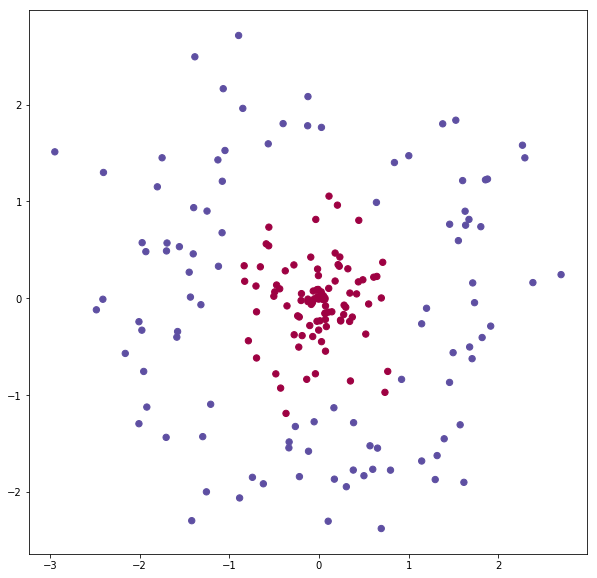

In [0]:
M = 200 #nombre d'échantillons
m = int(M/2) #nombre de points rouges et de points bleus
posB, posR = range(m), range(m,M) #la position des points bleus et rouges

# les échantillons
radius, angles = 0.5*randn(M), 2*pi*rand(M)
radius[posR] += 2
X = array(radius*[cos(angles), sin(angles)]).transpose()
y = ones(M)
y[posB] = 0
y = y.astype(int)

#affichage
scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

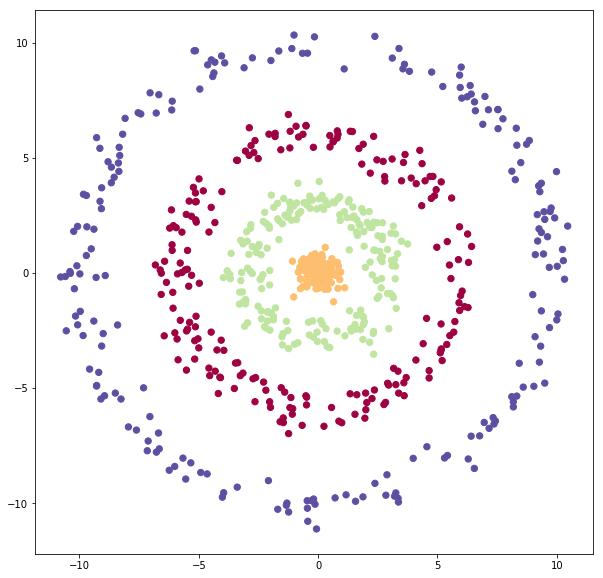

In [0]:
M = 800 #nombre d'échantillons
m = int(M/4) #nombre de points rouges et de points bleus
posB, posR, posJ, posK = range(m), range(m, 2*m), range(2*m, 3*m), range(3*m, M) #la position des points bleus et rouges

# les échantillons
radius, angles = 0.5*randn(M), 2*pi*rand(M)
radius[posR] += 3
radius[posJ] += 6
radius[posK] += 10
X = array(radius*[cos(angles), sin(angles)]).transpose()
y = ones(M)
y[posB] = 0
y[posJ] = -1
y[posK] = 2
y = y.astype(int)

#affichage
scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

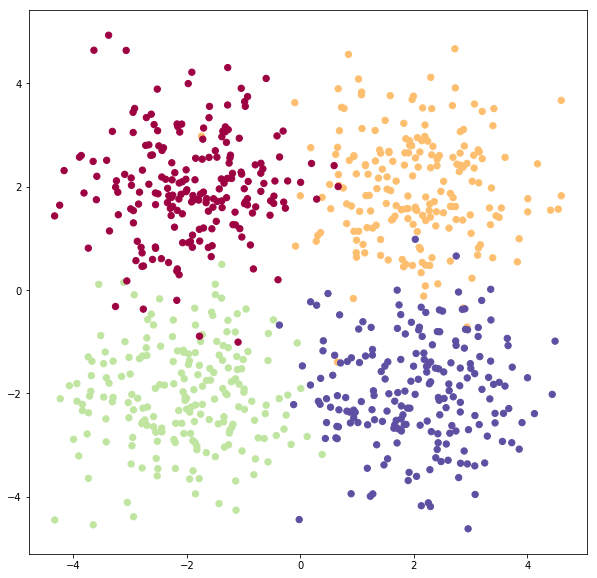

In [0]:
M = 800 #nombre d'échantillons
m = int(M/4) #nombre de points rouges et de points bleus
posB, posR, posJ, posK = range(m), range(m, 2*m), range(2*m, 3*m), range(3*m, M) #la position des points bleus et rouges

# les échantillons
X,Y = zeros((M,2)), ones(M)
X[posB,:] = randn(m,2) + [2,2]
X[posR,:] = randn(m,2) + [-2,-2]
X[posJ,:] = randn(m,2) + [-2,2]
X[posK,:] = randn(m,2) + [2,-2]
y[posB] = 0
y[posJ] = -1
y[posK] = 2
y = y.astype(int)

#affichage
scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

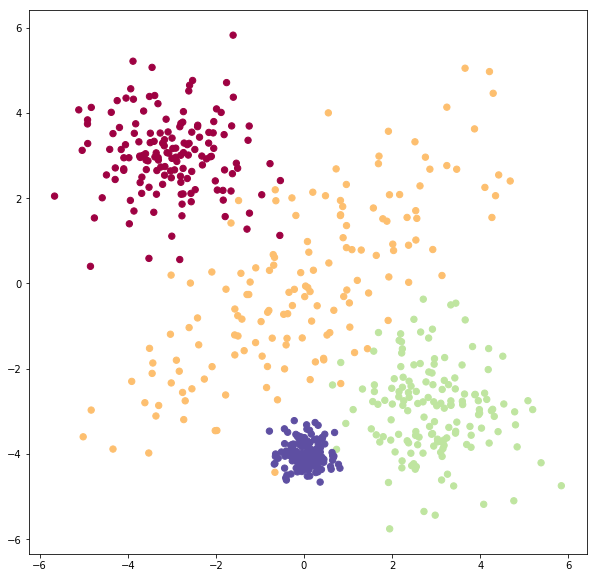

In [0]:
M = 600 #nombre d'échantillons
m = int(M/4) #nombre de points rouges et de points bleus
posB, posR, posJ, posK = range(m), range(m, 2*m), range(2*m, 3*m), range(3*m, M) #la position des points bleus et rouges

#les matrices de rotation et d'extension
def rotate(theta):
    R = zeros((2,2))
    R[0][0] = cos(theta)
    R[0][1] = sin(theta)
    R[1][0] = -cos(theta)
    R[1][1] = sin(theta)
    return R

K = eye(2)
K[0][0]=3

# les échantillons
X,Y = zeros((M,2)), ones(M)
X[posB,:] = randn(m,2).dot(K).dot(rotate(pi/4))
X[posR,:] = randn(m,2) + [3,-3]
X[posJ,:] = randn(m,2) + [-3,3]
X[posK,:] = 0.3*randn(m,2)+[0,-4]
y = ones(M)
y[posB] = 0
y[posJ] = -1
y[posK] = 2

y = y.astype(int)

#affichage
scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [0]:
#Dimensions d'entrée et de sortie du réseau de neurones
dim_input = 2
dim_output = 4

On crée alors nos matrices et vecteurs d'initialisation.

In [0]:
W1_0, b1_0, W2_0, b2_0 = GenWbinitial(dim_input,dim_output,15)

## Resolution de la descente du gradient ("training")

In [0]:
W1,b1,W2,b2, model, L = gradientsPasConstant(gradients, W1_0, b1_0, W2_0, b2_0,tau=0.02, tol=1e-4, Niter=20000, afferr=True)

Perte après 0 Itération :  6.63252720135
Perte après 1000 Itération :  0.0696255452503
Perte après 2000 Itération :  0.0614864372129
Perte après 3000 Itération :  0.0608470508053
Perte après 4000 Itération :  0.0601892697462
Perte après 5000 Itération :  0.0493367000399
Perte après 6000 Itération :  0.0488196728279
Perte après 7000 Itération :  0.0487845115228
Perte après 8000 Itération :  0.0487590195109
Perte après 9000 Itération :  0.0486733190001
Perte après 10000 Itération :  0.0479833571048
Perte après 11000 Itération :  0.0478583020257
Perte après 12000 Itération :  0.0478444328145
Perte après 13000 Itération :  0.0478420599315
Perte après 14000 Itération :  0.047842436664
Perte après 15000 Itération :  0.047843427505
Perte après 16000 Itération :  0.0478443043571
Perte après 17000 Itération :  0.0478447899097
Perte après 18000 Itération :  0.0478447864249
Perte après 19000 Itération :  0.0478442768583
Training finit


Les deux lignes suivantes sont "cachées" car servent de vérification ou d'une autre alternative pour effectuer le plot.

In [0]:
#plot(L)

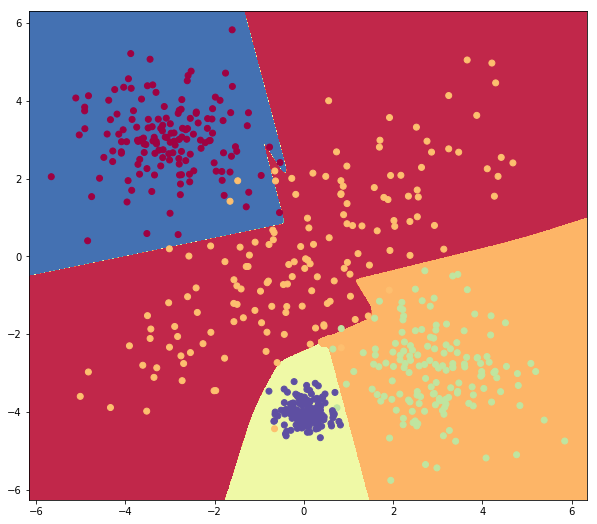

In [0]:
plot_decision_boundary(lambda x: predict(model, x))

Plot basé sur la fonction `ftildeprobs` écrite plus haut.

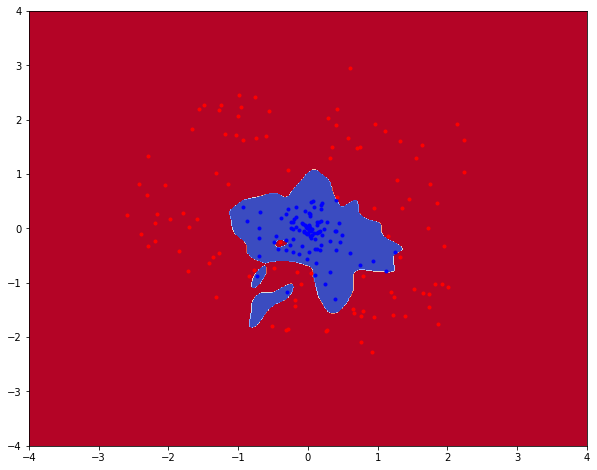

In [0]:
aa0 = linspace(-4,4,500)
aa1 = linspace(-4,4,500)
Z2 = [[sign(ftildeprobs(array([a0,a1]),W1,b1,W2,b2)[0]) for a0 in aa0] for a1 in aa1]
contourf(aa0,aa1,Z2,300,cmap="coolwarm")
plot(X[posB,0], X[posB, 1], '.b')
plot(X[posR,0], X[posR, 1], '.r')

## Calculs avec des tailles de couches différentes

Training finit
Training finit
Training finit
Training finit
Training finit
Training finit


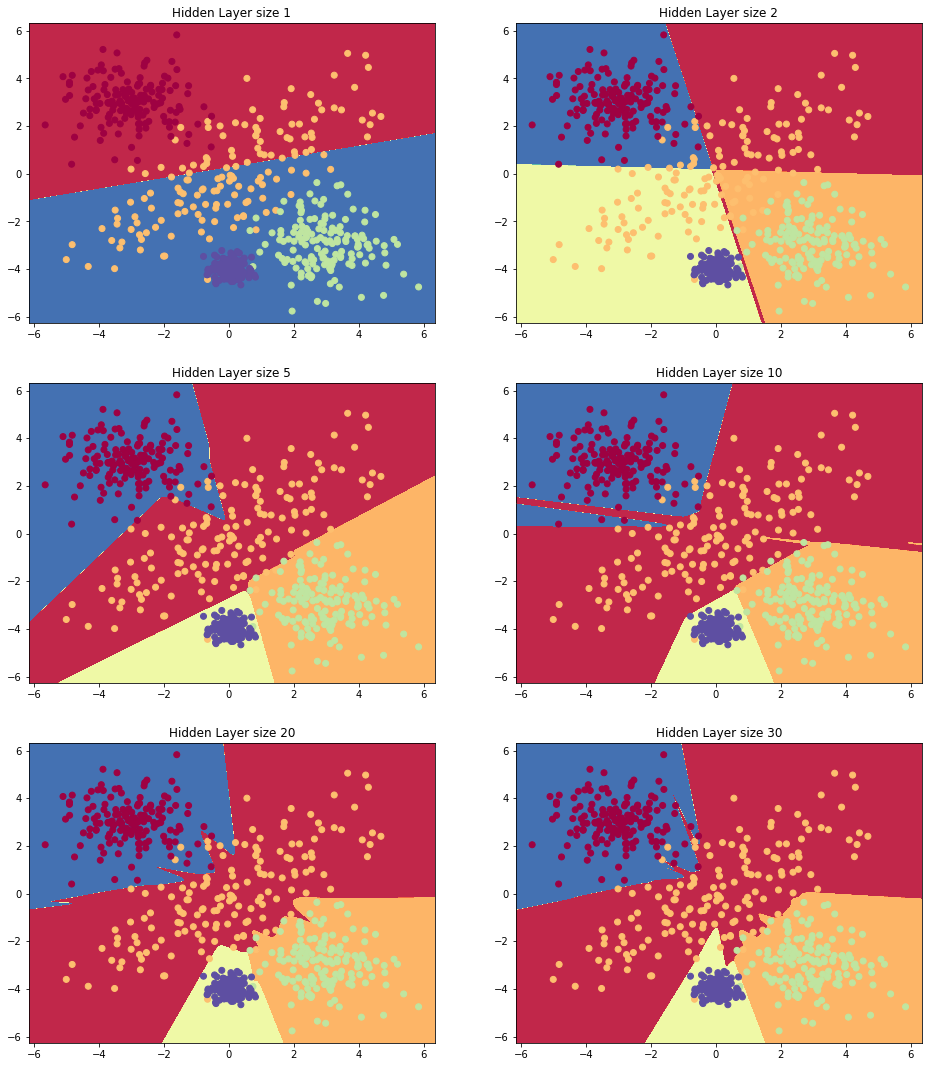

In [0]:
plt.figure(figsize=(16, 32))
dimensions = [1, 2, 5, 10, 20, 30]
Ltot = [[],[],[],[],[],[]]
for i, dim_couche in enumerate(dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % dim_couche)
    W1_0, b1_0, W2_0, b2_0 = GenWbinitial(dim_input,dim_output,dim_couche)
    W1,b1,W2,b2, model, L = gradientsPasConstant(gradients, W1_0, b1_0, W2_0, b2_0,tau=0.02, tol=1e-3, Niter=5000)
    Ltot[i].append(L)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

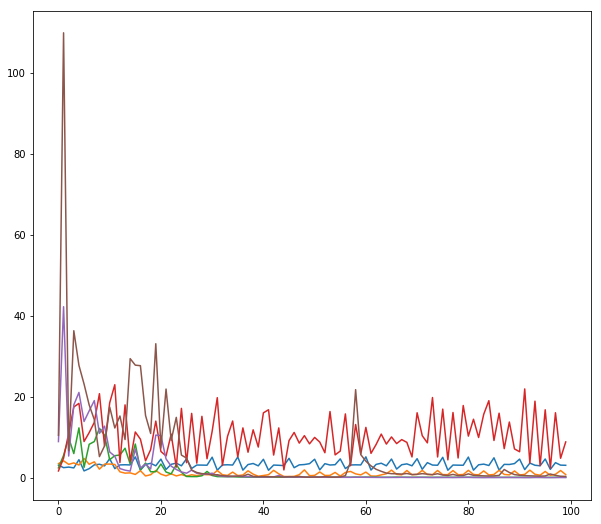

In [0]:
for i in range(6):
    plot(range(len(Ltot[i][0][0:100])),Ltot[i][0][0:100])